In [102]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Ep_sim = os.listdir('../todos_los_frames/energias_potenciales/')
RMSD_sim = os.listdir('../todos_los_frames/RMSD/')
Ep_sim=sorted(Ep_sim,key=len)
RMSD_sim=sorted(RMSD_sim,key=len)


In [103]:
sim_ep_df=pd.DataFrame({})
n=0
for i in Ep_sim:
    if(i.split('.')[-1]=='xvg'):
        print(i)
        with open('../todos_los_frames/energias_potenciales/'+i) as f:
            data = f.read()
            data = data.split('\n')
        sim_temp=[]
        
        for i in range(len(data[24:])-1):
            valor=float(data[24:][i][12:])
            sim_temp.append(valor)
        
        sim_ep_df.insert(n,'Ep_'+str(n),sim_temp)  
        n=n+1

sim_RMSD_df=pd.DataFrame({})
n=0
for i in RMSD_sim:
    if(i.split('.')[-1]=='xvg'):
        print(i)
        with open('../todos_los_frames/RMSD/'+i) as f:
            data = f.read()
            data = data.split('\n')
        sim_temp=[]
        
        for i in range(len(data[18:])-1):
            valor=float(data[18:][i][15:])
            sim_temp.append(valor)
        
        sim_RMSD_df.insert(n,'Rmsd_'+str(n),sim_temp)  
        n=n+1

pot_energy_md_charmm_50ns_310K_E=0,2_minim.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R1.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R2.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R3.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R4.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R5.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R6.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R7.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R8.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R9.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R10.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R11.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R12.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R13.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R14.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R15.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R16.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R17.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R18.xvg
pot_energy_md_charmm_50ns_310K_E=0,2_minim_R

In [104]:
print('Ep')
sim_min=sim_ep_df[min(sim_ep_df)].min()
sim_max=sim_ep_df[max(sim_ep_df)].max()
print('max:',sim_max)
print('min:',sim_min)
sim_ep_nom=((sim_ep_df-sim_min)/(sim_max-sim_min))

print('Rmsd')
sim_min=sim_RMSD_df[min(sim_RMSD_df)].min()
sim_max=sim_RMSD_df[max(sim_RMSD_df)].max()
print('max:',sim_max)
print('min:',sim_min)
sim_rmsd_nom=((sim_RMSD_df[:]-sim_min)/(sim_max-sim_min))

Ep
max: -318110.15625
min: -328549.21875
Rmsd
max: 1.6524644
min: 0.0


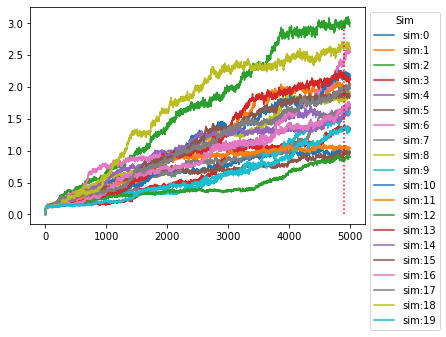

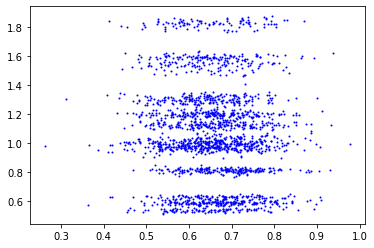

<function matplotlib.pyplot.show(*args, **kw)>

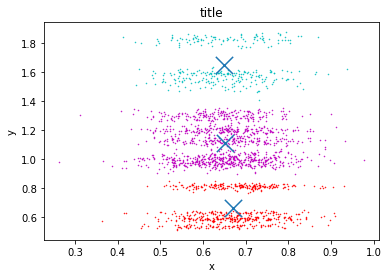

In [202]:
import matplotlib.pyplot as plt
import numpy as np


#parametros
#############################
dx=4900  #inicio de dt
tm=10     #tamaño del punto
n_Clusters=3
#############################


x=[]
name='Ep_0'
largo=len(sim_ep_df[name])
for i in range(largo):
    if(i<largo-1):
        x.append(sim_ep_df[name][i]-sim_ep_df[name][i+1])

y=[]
for i in range(len(sim_RMSD_df['Rmsd_0'])):
    if(i<len(sim_RMSD_df['Rmsd_0'])-1):
        x.append(sim_RMSD_df['Rmsd_0'][i]-sim_RMSD_df['Rmsd_0'][i+1])

dt=np.linspace(0,len(sim_ep_df['Ep_0'])*2-2,len(sim_ep_df['Ep_0'])*2-2)
dt=np.linspace(0,len(sim_RMSD_df['Rmsd_0']),len(sim_RMSD_df['Rmsd_0']))

n=0
for i in list(sim_RMSD_df):
    plt.plot(dt,sim_RMSD_df[i],label='sim:'+str(n))
    n=n+1
    
    plt.legend(title='Sim', bbox_to_anchor=(1, 1))
plt.plot([dx,dx],[0,3],':r'); 
plt.show()




plt.plot(sim_ep_nom[:][dx:], sim_rmsd_nom[:][dx:], "bo", markersize=0.1*tm)
plt.show()

sim_x = np.array(sim_ep_nom[:][dx:]).flatten()
sim_y = np.array(sim_rmsd_nom[:][dx:]).flatten()

X=np.array(list(zip( sim_x,sim_y )))

kmeans=KMeans(n_clusters=n_Clusters)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)

centroids=kmeans.cluster_centers_

colors=['m.','r.','c.','y.','b.','g.','m.']

for i in range(len(X)):
    #print('cordenada: ',X[i],'label: ',labels[i])
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=0.1*tm)

plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=300,linewidths=15,zorder=10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show